This notebok is intended as a one-stop reference to embeddings for myself.It does not need to have any specific relevance beyond that.

Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers(kind of unintuitive by the way)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import seaborn as sns
import gensim
import spacy
from scipy.spatial import distance
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


One Hot Vectorization or (Count vectorization)
The most basic form of embedding where we simply count the frequency of word in the document

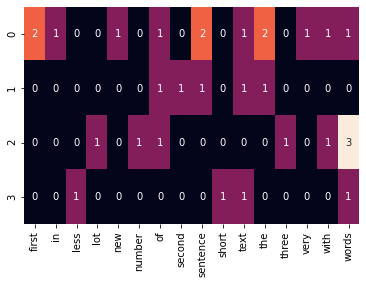

In [ ]:
vectorizer = CountVectorizer()
corpus = [
          'Text of the very first new sentence with the first words in sentence.',
          'Text of the second sentence.',
          'Number three with lot of words words words.',
          'Short text, less words.',
]

term_frequencies = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names()

# Convert the created frquency sparse matrix to numpy matrix
array = term_frequencies.toarray()
sns.heatmap(array,cbar=False,annot=True,xticklabels=vocab);

TF-IDF Vectorizer

In the above Countvectorizer approach there is lot of problems with the most obvious problem being that the words like "a","an","the" will appear very frequently without holding a lot of information

This contingency is handles using TF-IDF(term frequency — inverse document frequency).
![alt text](https://miro.medium.com/max/655/1*tMTbOwNzKx06chETJkZ6ww.png)
Where TF is calculated by dividing number of times the word occurs in the document by the total number of words in the document
![alt text](https://miro.medium.com/max/349/1*y2mxpp2Vl6W7_ZmdUISkXA.png)

And idf is

![alt text](https://miro.medium.com/max/223/1*6PP8jjIoi7Oe3O1Wo4a2vQ.png)


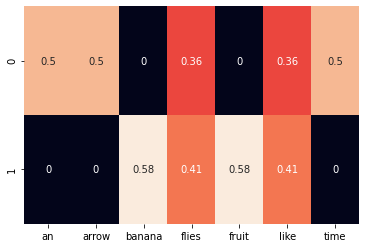

In [ ]:
corpus = [
          'Time flies like an arrow.',
          'Fruit flies like a banana.'
]
vocab = ['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']

# Use such an in-line methodology whenever possible. Not particularly good but saves memory anyday  
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

sns.heatmap(tfidf,cbar=False,annot=True,xticklabels=vocab);

The most commonly used models for word embeddings are word2vec and GloVe which are both unsupervised approaches based on the distributional hypothesis (words that occur in the same contexts tend to have similar meanings)

Word2Vec word embeddings are vector representations of words, that are typically learnt by an unsupervised model when fed with large amounts of text as input. Word2Vec word embeddings are learnt in a such way, that distance between vectors for words with close meanings (“king” and “queen” for example) are closer than distance for words with complety different meanings (“king” and “carpet” for example).



In [ ]:
# Preparatory steps for loading gensim model
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
!gunzip GoogleNews-vectors-negative300.bin

--2020-08-12 12:16:51--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.98.203
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.98.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  35.0MB/s    in 46s     

2020-08-12 12:17:37 (34.1 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

In [ ]:
print(model.most_similar(positive=['woman','king'],negative=['man']))
print(model.similarity('woman','man'))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.518113374710083), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411999702454)]
0.76640123


In [ ]:
del model

It is based on matrix factorization techniques on the word-context matrix. It first constructs a large matrix of (words x context) co-occurrence information, i.e. for each “word” (the rows), you count how frequently we see this word in some “context” (the columns) in a large corpus. 

Then this matrix is factorized to a lower-dimensional (word x features) matrix, where each row now stores a vector representation for each word. In general, this is done by minimizing a “reconstruction loss”. This loss tries to find the lower-dimensional representations which can explain most of the variance in the high-dimensional data.

In [ ]:
# Glove preparatory steps
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.8MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=5bf41b6e106ab23a40326aefda938632b7afbf383a9b0738fc989bcc7fffe1a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-pqrllzae/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import en_core_web_lg
nlp = en_core_web_lg.load()
# process a sentence using the model
doc = nlp("man king stands on the carpet and sees woman queen")
print(doc[1].similarity(doc[9]))
print(doc[1].similarity(doc[5]))

0.72526103
0.20431946


In [ ]:
# Lets verify the queen = king - man + woman idea
v = doc[1].vector - (doc[0].vector*2) + (doc[-2].vector*2)

vectors = [token.vector for token in doc]
vectors = np.array(vectors)

closest_index = distance.cdist(np.expand_dims(v,axis=0),vectors,metric='cosine').argmin()
output_word = doc[closest_index].text
print(output_word)

queen


FastText is an extension of word2vec.

The main improvement of FastText over the original word2vec vectors is the inclusion of character n-grams, which allows computing word representations for words that did not appear in the training data 

In [ ]:
# FastText preparation.This is built on Cython and hence rather fast
!pip install Cython --install-option="--no-cython-compile"
!pip install fasttext

# Download pre-trained language vectors
import fasttext
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')

In [ ]:
ft.get_word_vector('king')
ft.get_nearest_neighbors('king')

In [1]:
%tensorflow_version 1.x
import tensorflow_hub as hub
import tensorflow as tf

elmo = hub.Module("https://tfhub.dev/google/elmo/3",trainable=True)

sentences =  ['king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle of \
medieval romances (known as the matter of britain) as the sovereign of a knightly fellowship of the round table.', 
'it is not certain how these legends originated or whether the figure of arthur was based on a historical person.', 
'the legend possibly originated either in wales or in those parts of northern britain inhabited by brythonic-speaking celts.', 
'for a fuller treatment of the stories about king arthur, see also arthurian legend.']

TensorFlow 1.x selected.


In [3]:
words = []
mask = []
masked_words = []

for line in sentences:
  splitted = line.split()
  for i in range(36):
    try:
      words.append(splitted[i])
    except:
      words.append('_')

for word in words:
  if word == '_':
    mask.append(False)
  else:
    mask.append(True)
    masked_words.append(word)

In [12]:
embeddings = elmo(sentences,signature='default',as_dict=True)['elmo']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [13]:
%%time
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  sess.run(tf.tables_initializer())
  x = sess.run(embeddings)
embs = x.reshape(-1, 1024)
masked_embs = embs[mask]

CPU times: user 9.16 s, sys: 467 ms, total: 9.62 s
Wall time: 5.9 s


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
y = pca.fit_transform(masked_embs)
from sklearn.manifold import TSNE
y = TSNE(n_components=2).fit_transform(y)
import plotly as py
import plotly.graph_objs as go
data = [
    go.Scatter(
        x=[i[0] for i in y],
        y=[i[1] for i in y],
        mode='markers',
        text=[i for i in masked_words],
    marker=dict(
        size=16,
        color = [len(i) for i in masked_words], #set color equal to a variable
        opacity= 0.8,
        colorscale='Viridis',
        showscale=False
    )
    )
]
layout = go.Layout()
layout = dict(
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )
fig = go.Figure(data=data, layout=layout)
fig.show()